<a href="https://colab.research.google.com/github/waiyankyaw961999/ML_DL_learningpath/blob/master/Guided%20Project/%20PCA_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project-based Course Overview

Course Name - [Principal Component Analysis with Numpy](https://www.coursera.org/learn/principal-component-analysis-numpy/supplement/2KrW0/project-based-course-overview) 

Instructor  - Snehan Kekre

Course Objectives
In this course, we are going to focus on three learning objectives:

Implement Principal Component Analysis (PCA) from scratch with NumPy and Python
Conduct basic exploratory data analysis (EDA)
Create simple data visualizations with Seaborn and Matplotlib
By the end of this course, you will be able to implement all the machine learning without using any of the popular machine learning libraries such as scikit-learn and statsmodels so you have a deeper understanding of the fundamentals.

## Task 1: Introduction and Project Overview
Introduction to the data set and the problem overview.
See a demo of the final product you will build by the end of this project.
Introduction to the Rhyme interface.

##Task 2: Load the Data and Import Libraries
* Load the dataset using pandas.
* Import essential modules and helper functions from NumPy and Matplotlib.
* Explore the pandas dataframe using the head() and info() functions.

In [1]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

In [3]:
iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/MC_Colab/Data/iris.data",
                   header = None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.columns = ["sepal_length","sepal_width","petal_length","petal_width","species"]
iris.dropna(how='all',inplace = True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


## Task 3: Visualize the Data
* Before starting on any task, it is often useful to understand the data by visualizing it.
* For this dataset, we can use a scatter plot using Seaborn to visualize the data.

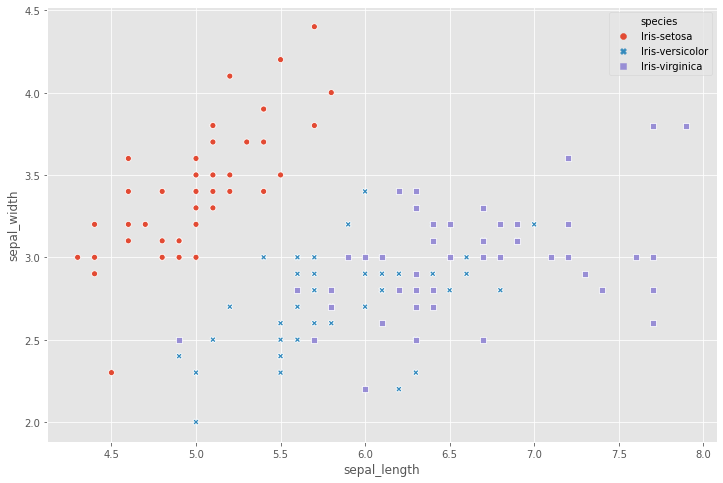

In [6]:
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
                hue = iris.species, style = iris.species);
               

## Task 4: Data Standardization
* With great power to reduce dimensionality, comes great responsibility.
* One must take care to preprocess the input data appropriately.
* Make sure to zero-out the mean from each feature (subtract the mean of each feature from the training set), and normalize the values if your features have differing units.
* PCA is best used when the data is linear, because it is projecting it onto a linear subspace spanned by the eigenvectors.
* This is an important step in many machine learning algorithms, and especially so in the case of PCA. We want the PCA algorithm to give equal weight to each of the features while making the projection.
* If one or more features are in a different scale than the rest, those non-standardized features will dominate the eigenvalues and give you an incorrect result This is a direct consequence of how PCA works. It is going to project our data into directions that maximize the variance along the axes

In [7]:
X = iris.iloc[:,0:4].values
y = iris.species.values


In [8]:
from sklearn.preprocessing import StandardScaler

X =  StandardScaler().fit_transform(X)


## Task 5: Compute the Eigenvectors and Eigenvalues
* There are two general ways to perform PCA. The more computationally effective way is to do something called Singular Value Decomposition or SVD.
* It decomposes a matrix into the product of two unitary matrices (U, V*) and a rectangular diagonal matrix of singular values (S).
* The mathematics of computing the SVD is a little complicated and out of the scope of this project. If you’re familiar with linear algebra, I highly encourage you to read about it on your own time.
* Luckily for us, there is a numpy function that performs SVD on the input matrix, so we don’t really need to worry about the math for now.
* We’re going to cover SVD in the next task.
* Recall that PCA aims to find linearly uncorrelated orthogonal axes, which are also known as principal components (PCs) in the m dimensional space to project the data points onto those PCs. The first PC captures the largest variance in the data.
The PCs can be determined via eigen decomposition of the covariance matrix Σ.

* After all, the geometrical meaning of eigen decomposition is to find a new coordinate system of the eigenvectors for Σ through rotations.

Covariance: $\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{N}(x_{ij}-\bar{x_j})(x_{ik}-\bar{x_k})$

Coviance matrix: $\sum  = \frac{1}{n-1}((X-\bar{x})^T(X-\bar{x}))$

In [9]:
convariance_matrix = np.cov(X.T)
print("Convariance matrix: \n",convariance_matrix)

Convariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


## Task 6: Singular Value Decomposition (SVD)
* Singular Value Decomposition or SVD is a computationally efficient method to perform PCA.
* It decomposes a matrix into the product of two unitary matrices (U, V*) and a rectangular diagonal matrix of singular values (S). The mathematics of computing the SVD is a little complicated and out of the scope of this project.

In [10]:
eigen_values , eigen_vectors = np.linalg.eig(convariance_matrix)
print("Eigenvectors: \n",eigen_vectors, "\n")
print("Eigenvalues: \n",eigen_values)

Eigenvectors: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601]


In [11]:
eigen_vec_svd, s, v = np.linalg.svd(X.T)
eigen_vec_svd

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

##Task 7: Selecting Principal Components Using the Explained Variance
* The use of PCA means that the projected data can be analyzed along axes of principal variation.
* Plot the cumulative explained variance against the number of principal components.
* Rank components according to the explained variance each component contributes to the model.

In [12]:
for val in eigen_values:
  print(val)

2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [13]:
variance_explained = [(i/sum(eigen_values))*100 for i in eigen_values]
print(variance_explained)

[72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


In [14]:
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)

[ 72.77045209  95.80097536  99.48480732 100.        ]


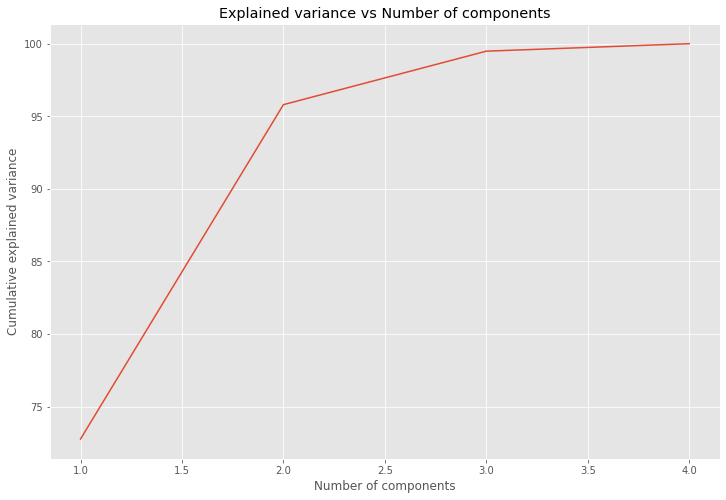

In [15]:
sns.lineplot(x = [1,2,3,4], y = cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components");

## Task 8: Project Data Onto Lower-Dimensional Linear Subspace
* Utilize principal component analysis to decompose high dimensional data into two or three dimensions so that each instance can be plotted in a scatter plot.

$X_pca$ = $X.W$

In [16]:
eigen_vectors

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [17]:
projection_matrix = (eigen_vectors.T[:][:])[:2].T
print("Projection matrix: \n", projection_matrix)

Projection matrix: 
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [22]:
X_pca = X.dot(projection_matrix)


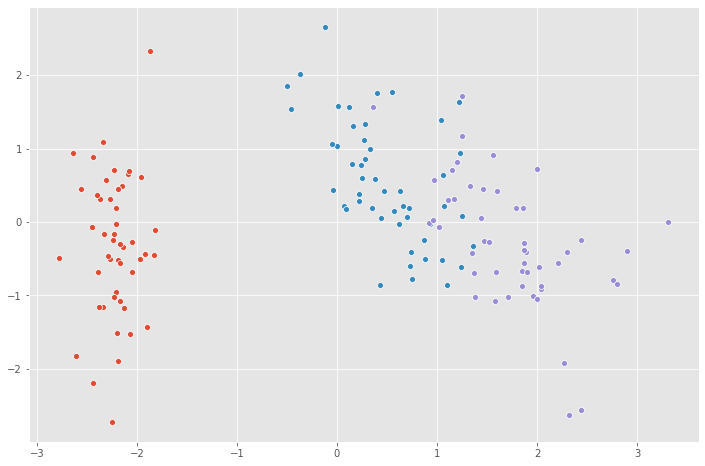

In [27]:
for species in ('Iris-setosa','Iris-versicolor','Iris-virginica'):
  sns.scatterplot(X_pca[y==species,0],
                  X_pca[y==species,1])